Signal Processing in Python
===

Here we're going to take in a wav file and break it down into it's 

In [56]:
# Imports
import matplotlib
matplotlib.use('nbagg')

import IPython
from matplotlib.mlab import find
import matplotlib.pyplot as plt

import wave
import struct
import numpy as np
from scipy.fftpack import fft
from scipy.io import wavfile
from scipy.signal import blackmanharris, fftconvolve
from aubio import source, pitch

In [106]:
soundfile = "hello_world.wav"

fs, sig = wavfile.read(soundfile)

try:
    if len(sig[0])>1:
        print "YOU"
        sig1, sig2 = zip(*sig)
        sig = sig1
except:
    pass
print "Sample Frequence:\t",fs, "Hz\nSamples:\t\t", len(sig)
#fs = fs*2.
N = len(sig)
T = 1./float(fs)

x = np.linspace(0.0, N*T, N)
#sig = np.sin(50. * 2.*np.pi*x) + .5*np.sin(80.*2.*np.pi*x)

yf = fft(sig)
#plt.plot(np.abs(yf))
#plt.show()
#print yf[1380]
xf = np.linspace(0.0, 1./float(2.*T), N/2)

Sample Frequence:	8000 Hz
Samples:		13746


In [107]:
IPython.display.Audio(soundfile)

<IPython.core.display.Javascript object>


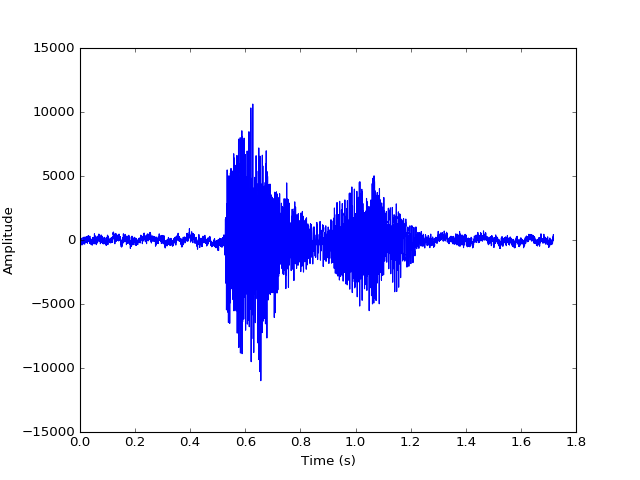

In [108]:
fig, ax = plt.subplots()
ax.plot(x, sig)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

<IPython.core.display.Javascript object>


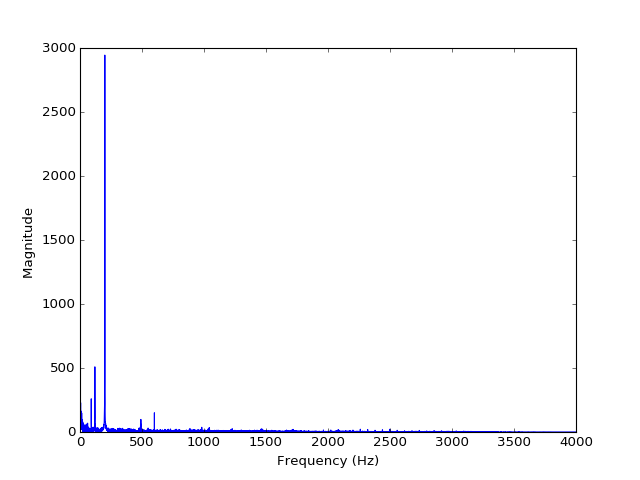

In [58]:
fig, ax = plt.subplots()
ax.plot(xf, 2.0/float(N)*np.abs(yf[:N/2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude ")
plt.show()

In [53]:
print len(xf), len(np.abs(yf))/2, len(sig)

6223 6223 12446


Weee ok so we finally have the file organized propperly, we can get the correct frequency, and scale the x axis as we need

[Look at this--it'd be fun to implement](http://recherche.ircam.fr/equipes/pcm/cheveign/pss/2002_JASA_YIN.pdf)
[Linked to from this post](http://stackoverflow.com/questions/2648151/python-frequency-detection)

In [54]:

# Following demo at http://git.aubio.org/?p=aubio.git;a=blob;f=python/demos/demo_pitch.py;h=555a30e64eacff25311a4b333e71f0d82e153ad5;hb=refs/heads/master

# Below is trouble shooting to figure out how to use pitch

#win_s = len(sig)
#pitch_o = pitch('yin', win_s, 512, fs)
#sig = np.array(sig).astype(np.float32)
#print pitch_o(sig)[0]

#---------------------------------------------------------------------------
#ValueError                                Traceback (most recent call last)
#<ipython-input-14-7ca991930c9f> in <module>()
#      5 pitch_o = pitch('yin', win_s, 512, fs)
#      6 sig = np.array(sig).astype(np.float32)
#----> 7 print pitch_o(sig)[0]
#
#ValueError: input size of pitch should be 512, not 5016

In [102]:
# Ok looking at the above error, change 512 to the size of the signal
win_s = len(sig)
pitch_o = pitch('yin', win_s, win_s, fs)
sig_for_pitch = np.array(sig).astype(np.float32)
print "Estimated Fundamental Frequency: ", pitch_o(sig_for_pitch)[0], " Hz"

Estimated Fundamental Frequency:  1.21027  Hz


In [101]:
# Time to figure out the power of a signal 
#print sig[:100]
ms = [(abs(i) ** 2)/float(len(sig)) for i in sig]
print ms[10]
xrms = np.sqrt(sum(ms))

print xrms

55.0466560328
982.01378492


In [100]:
zero_crossings = 0
last_val = sig[0]
for i in range(1,len(sig)):
    if last_val > 0 and sig[i] < 0:
        zero_crossings +=1
    elif last_val < 0 and sig[i] > 0:
        zero_crossings += 1
    last_val = sig[i]
    
print float(zero_crossings)/float(len(sig))



0.0951350119631


Ok, so here zero crossing doesn't look great. But we have whole 
sound samples used here. Moving to the next notebook, lets 
start segmenting things up into smaller sections so we can see if zero crossings becomes more useful on smaller sub-samples. 